In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [35]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score

In [37]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [24]:
#df['target'] = df['default.payment.next.month'] 
#df.drop(['default.payment.next.month'], axis=1).head()# forgot how to rename a column

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [59]:
X = df.drop(['default.payment.next.month'], axis=1)
y = df['default.payment.next.month']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=9)

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


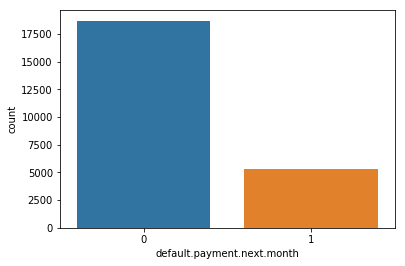

In [40]:
sns.countplot(y_train)
print df['default.payment.next.month'].value_counts()

In [60]:
#classifier without any resampling or feature selection.
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=200,
                             algorithm="SAMME.R", 
                             learning_rate=0.5, 
                             random_state=42)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

In [61]:
ada_proba = ada_clf.predict_proba(X_test)
ada_proba = pd.DataFrame(ada_proba)
ada_proba_auc = ada_proba[1]
ada_proba_auc.head()

0    0.498508
1    0.496557
2    0.495841
3    0.495610
4    0.494891
Name: 1, dtype: float64

In [62]:
print roc_auc_score(y_test, ada_proba_auc)
roc1 = roc_auc_score(y_test, ada_proba_auc)

0.775658132605


In [ ]:
#we will now under sample the data and use adaboost

In [44]:
# Class count
count_class_0, count_class_1 = df['default.payment.next.month'].value_counts()

# Divide by class
df_class_0 = df[df['default.payment.next.month'] == 0]
df_class_1 = df[df['default.payment.next.month'] == 1]

In [45]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under['default.payment.next.month'].value_counts())

Random under-sampling:
1    6636
0    6636
Name: default.payment.next.month, dtype: int64


In [47]:
X1 = df_under.drop(['default.payment.next.month'], axis=1)
y1 = df_under['default.payment.next.month']

X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.2, random_state=9)

ada_clf1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=200,
                             algorithm="SAMME.R", 
                             learning_rate=0.5, 
                             random_state=42)
ada_clf1.fit(X_train1, y_train1)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

In [63]:
ada_proba1 = ada_clf1.predict_proba(X_test1)
ada_proba1 = pd.DataFrame(ada_proba1)
ada_proba_auc1 = ada_proba1[1]
print roc_auc_score(y_test1, ada_proba_auc1)
roc2 = roc_auc_score(y_test1, ada_proba_auc1)

0.77019422438


In [52]:
#Under sampling gave bad results afeter under sampling.
#lets try over sampling

Random over-sampling:
1    23364
0    23364
Name: default.payment.next.month, dtype: int64


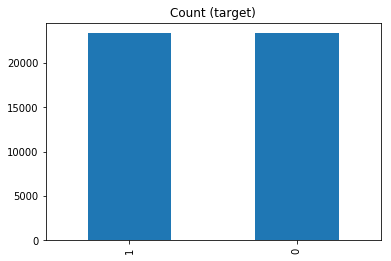

In [53]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over['default.payment.next.month'].value_counts())

df_over['default.payment.next.month'].value_counts().plot(kind='bar', title='Count (target)');

In [56]:
X2 = df_over.drop(['default.payment.next.month'], axis=1)
y2 = df_over['default.payment.next.month']

X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size = 0.2, random_state=9)

ada_clf2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=200,
                             algorithm="SAMME.R", 
                             learning_rate=0.5, 
                             random_state=42)
ada_clf2.fit(X_train2, y_train2)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

In [64]:
ada_proba2 = ada_clf2.predict_proba(X_test2)
ada_proba2 = pd.DataFrame(ada_proba2)
ada_proba_auc2 = ada_proba2[1]
print roc_auc_score(y_test2, ada_proba_auc2)
roc3 = roc_auc_score(y_test2, ada_proba_auc2)

0.784225831537


In [68]:
print 'roc auc score for direct Adaboosting is: ', roc1
print 'roc auc score for under sapmled data Adaboosting is: ', roc2
print 'roc auc score for over sampled data Adaboosting is: ', roc3

roc auc score for direct Adaboosting is:  0.775658132605
roc auc score for under sapmled data Adaboosting is:  0.77019422438
roc auc score for over sampled data Adaboosting is:  0.784225831537
